#Ejemplo Sencillo Regresión Logística

In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns #Hacer gráficos

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
#Creamos el dataset
x = np.array([[1,1],
             [2,1],
             [3,1],
             [4,0],
             [1.5 ,2],
             [3,2],
             [1,3],
             [1.5,3],
             [2.5,3],
             [4,1],
             [1,8],
             [1.5,7],
             [3,8],
             [3,6],
             [4,5],
             [5,5],
             [6,4],
             [7,3]])

In [4]:
y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

In [5]:
x.shape

(18, 2)

In [6]:
y.shape

(18,)

<Axes: >

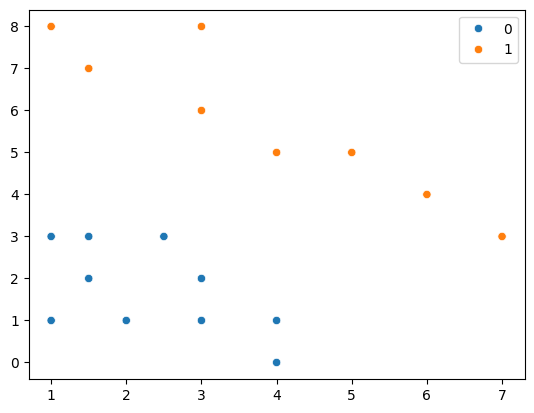

In [7]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y)

In [8]:
model = LogisticRegression(penalty = 'none', random_state = 42)
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=42)

In [9]:
ypred = model.predict(x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
#Ver los parámetros
model.intercept_ #(intercept es theta 0)

array([-52.7065153])

In [12]:
model.coef_.shape

(1, 2)

In [13]:
model.coef_

array([[6.28914074, 7.96149652]])

In [14]:
#Necesitamos transponer el coeficiente para poder hacer la multiplicación matricial

In [15]:
#Calcular la función z
# t0 +t1*x1 + t2*x2 ...
z = model.intercept_ + (x @ model.coef_.T)
z

array([[-38.45587804],
       [-32.1667373 ],
       [-25.87759657],
       [-27.54995235],
       [-27.34981115],
       [-17.91610004],
       [-22.53288499],
       [-19.38831462],
       [-13.09917389],
       [-19.58845583],
       [ 17.27459763],
       [ 12.45767147],
       [ 29.8528791 ],
       [ 13.92988606],
       [ 12.25753027],
       [ 18.54667101],
       [ 16.87431522],
       [ 15.20195943]])

In [16]:
#Visualizar la hipótesis
gx = 1/(1+np.exp(-z))
gx

array([[1.98986846e-17],
       [1.07192275e-14],
       [5.77434338e-12],
       [1.08444546e-12],
       [1.32473172e-12],
       [1.65629087e-08],
       [1.63716475e-10],
       [3.79981054e-09],
       [2.04691672e-06],
       [3.11058249e-09],
       [9.99999969e-01],
       [9.99996112e-01],
       [1.00000000e+00],
       [9.99999108e-01],
       [9.99995251e-01],
       [9.99999991e-01],
       [9.99999953e-01],
       [9.99999750e-01]])

<Axes: >

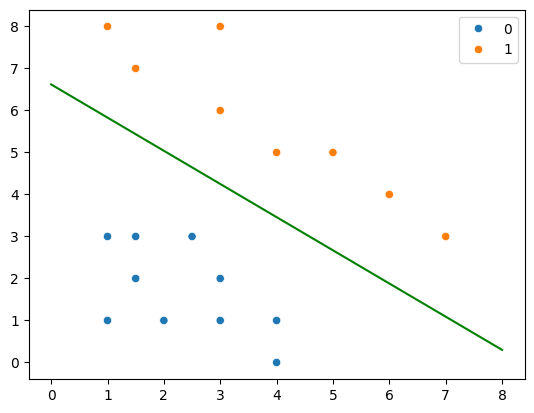

In [17]:
#Dibujar el decision bundary (recta)
# Ecuación de la recta => y = mx + c
# Primero debemos igualar la ecuación de z a 0 y desoejarla en función de y
t1, t2 = model.coef_.T
t0 = model.intercept_

c = -t0/t2
m = -t1/t2

# Se deben dar dos puntos para graficar la línea, se darán los dos extremos de la gráfica.
xmin , xmax = 0,8

xd = np.array([xmin, xmax])
yd = m*xd + c

sns.scatterplot(x = x[:,0], y = x[:,1], hue = y)
sns.lineplot(x=xd, y = yd, color = 'g')

#Ejemplo con Breast Cancer Dataset
https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction/data

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()
#En el diagnóstico M es maligno y P benigno

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_filter = df.iloc[:,1:12] #Seleccionamos las columnas de la 1 a la 11 inclusive

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [ ]:
#Reemplazar las M y B con 1 y 0
df_filter.replace('B',0,inplace=True)
df_filter.replace('M',1,inplace=True)

In [ ]:
y = df_filter['diagnosis']
x = df_filter.drop('diagnosis', axis=1)

In [ ]:
#Importamos la librería para dividir el dataet en entrenamiento y testeo
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,shuffle=True,test_size=0.15, random_state=42)

In [ ]:
#Definir el modelo de regresión logística
model = LogisticRegression(penalty = 'none', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
333    0
86     1
250    1
274    1
257    1
Name: diagnosis, Length: 86, dtype: int64

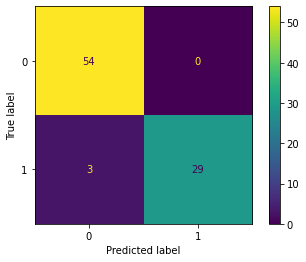

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.91      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



En un modelo siempre se dan falsos negativos y falsos positivos, dependerá del caso en cuál queremos miimizar los falsos resultados

En este caso es conveniente minimizar los falsos negativos

##SVM - Support Vector Machines

In [ ]:
#SVM = Support Vector Machines -> Máquina de Soporte Vectorial
from sklearn.svm import SVC

In [ ]:
model = SVC(C = 0.5 , gamma = 'scale', kernel = 'poly', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

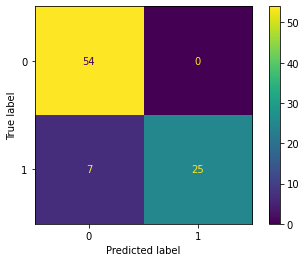

In [ ]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      0.78      0.88        32

    accuracy                           0.92        86
   macro avg       0.94      0.89      0.91        86
weighted avg       0.93      0.92      0.92        86



## KNN - K Nearest Neighbors

In [ ]:
#KNN Identifica los puntos que se encuentran cercanos en la gráfica y los clasifica en una sola clase
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

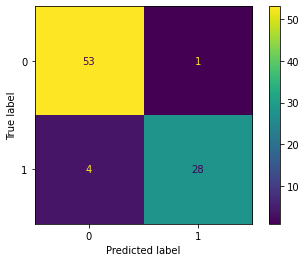

In [ ]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.97      0.88      0.92        32

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth = None, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

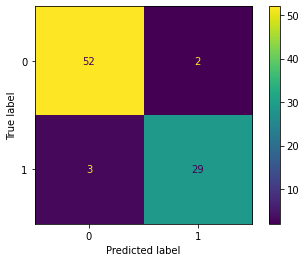

In [ ]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.94      0.91      0.92        32

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



#Clasificación Multiclase

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X.shape

(150, 4)

In [ ]:
#Definir la división de la muestra
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.10, random_state=42)

In [ ]:
#Definir el modelo de regresión logística
model = LogisticRegression(penalty = 'none', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

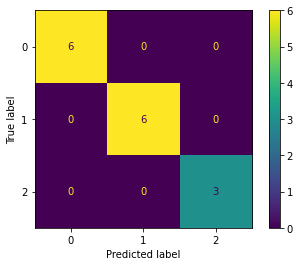

In [ ]:
#Matriz de confusion
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
#Métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

